In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt



In [20]:
file_path = r"C:\Users\User\Desktop\General_fold\DV_genova_tableau\trees\\"
file_list = os.listdir(file_path)


In [3]:
df_append = pd.DataFrame()
#append all files together
for file in file_list:
            df_temp = pd.read_csv(file_path  + file)
            df_temp['file_name'] = file.split('_')[0]
            df_append = df_append.append(df_temp, ignore_index=True)
df_append

C:\Users\User\AppData\Local\Temp\ipykernel_81164\730853186.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_81164\730853186.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_81164\730853186.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_81164\730853186.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(

C:\Users\User\AppData\Local\Temp\ipykernel_81164\730853186.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_81164\730853186.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_81164\730853186.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_81164\730853186.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(

C:\Users\User\AppData\Local\Temp\ipykernel_81164\730853186.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)


,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,...,neighborhood,location_name,ward,district,overhead_utility,diameter_breast_height_CM,percent_population,file_name,column_name,definition
0,6/17/2020,inventory_date,Locust,NaN,Albuquerque,New Mexico,-106.568366,35.060456,NaN,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albuquerque,NaN,NaN
1,6/9/2020,inventory_date,Oak,Quercus,Albuquerque,New Mexico,-106.655037,35.139272,1641 Tierra Del Rio Northwest,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albuquerque,NaN,NaN
2,6/3/2020,inventory_date,Ash,Fraxinus,Albuquerque,New Mexico,-106.581127,35.052176,Us Veterans Hospital Loop,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albuquerque,NaN,NaN
3,6/3/2020,inventory_date,Scotch pine,Pinus sylvestris,Albuquerque,New Mexico,-106.575056,35.052450,1606 San Pedro Drive Southeast,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albuquerque,NaN,NaN
4,5/29/2020,inventory_date,Honeylocust,Gleditsia triacanthos,Albuquerque,New Mexico,-106.716539,35.149632,5700 Bogart Street Northwest,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albuquerque,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660259,NaN,NaN,NaN,Zelkova serrata,Worcester,Massachusetts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worcester,NaN,NaN
5660260,NaN,NaN,NaN,Zelkova serrata,Worcester,Massachusetts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worcester,NaN,NaN
5660261,NaN,NaN,NaN,Zelkova serrata,Worcester,Massachusetts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worcester,NaN,NaN
5660262,NaN,NaN,NaN,Zelkova serrata,Worcester,Massachusetts,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worcester,NaN,NaN


In [4]:
states = list(df_append['state'].unique())
for state in states:
    print(state)
    cities = list(df_append[df_append['state'] == state]['file_name'].unique())
    print(cities)
    print()
    

New Mexico
['Albuquerque']

nan
[]

California
['Anaheim', 'Fresno', 'GardenGrove', 'HuntingtonBeach', 'Irvine', 'LosAngeles', 'Oakland', 'Ontario', 'RanchoCucamonga', 'Sacramento', 'SanDiego', 'SanFrancisco', 'SanJose', 'SantaRosa', 'Stockton']

Texas
['Arlington', 'Austin', 'Dallas', 'Houston', 'Plano']

Georgia
['Atlanta']

Colorado
['AuroraCO', 'ColoradoSprings', 'Denver']

Maryland
['Baltimore']

Massachusetts
['Boston', 'Worcester']

New York
['Buffalo', 'NewYork', 'Rochester']

Florida
['CapeCoral', 'Miami', 'Orlando', 'Tampa']

Ohio
['Columbus']

Iowa
['DesMoines']

Michigan
['Detroit', 'GrandRapids']

North Carolina
['Durham', 'Greensboro']

Hawaii
['Honolulu']

Indiana
['Indianapolis']

New Jersey
['Jerseycity']

Tennessee
['Knoxville', 'Nashville']

Nevada
['LasVegas']

Kentucky
['Louisville']

Wisconsin
['Madison', 'Milwaukee']

Minnesota
['Minneapolis']

Louisiana
['NewOrleans']

Oklahoma
['OklahomaCity']

Kansas
['OverlandPark']

Arizona
['Phoenix']

Pennsylvania
['Pittsb

In [5]:
state_cities = ['Anaheim', 'Fresno', 'GardenGrove', 'HuntingtonBeach', 'Irvine', 'LosAngeles', 'Oakland', 'Ontario', 'RanchoCucamonga', 'Sacramento', 'SanDiego', 'SanFrancisco', 'SanJose', 'SantaRosa', 'Stockton']

In [6]:
number = []
for city in state_cities:
    print(city)
    print(len(df_append[df_append['file_name'] == city]))
    number.append(len(df_append[df_append['file_name'] == city]))

Anaheim
79651
Fresno
6980
GardenGrove
17522
HuntingtonBeach
55828
Irvine
58364
LosAngeles
720140
Oakland
38613
Ontario
58577
RanchoCucamonga
82947
Sacramento
87191
SanDiego
212304
SanFrancisco
188462
SanJose
347669
SantaRosa
3016
Stockton
98300


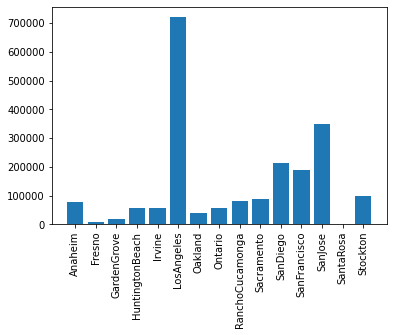

In [8]:
plt.bar(state_cities, height = number)
plt.xticks(rotation='vertical')
plt.show()

In [9]:
chosen_cities = ['Anaheim','RanchoCucamonga','Sacramento','Irvine','Ontario']

In [10]:
df = df_append[df_append['file_name'].isin(chosen_cities)]

In [11]:
list_spec = []
list_num = []
for i, city in enumerate(chosen_cities):
    list_spec.append(list(df_append[df_append['file_name']== city].groupby("common_name").count().sort_values(by='scientific_name', ascending=False)['scientific_name'].head(20).index))
    list_num.append(list(df_append[df_append['file_name']== city].groupby("common_name").count().sort_values(by='scientific_name', ascending=False)['scientific_name'].head(20)/len(df_append[df_append['file_name']== city])))

In [12]:
dict_trees = {}
for i in range(len(list_spec)):
    for j in range(20):
        if list_spec[i][j] in dict_trees:
            dict_trees[list_spec[i][j]] += list_num[i][j]
        else:
            dict_trees[list_spec[i][j]] = list_num[i][j]
            

In [13]:
d = sorted(dict_trees.items(), key=lambda x:x[1])

In [14]:
d[::-1][:5]

[('Crape myrtle', 0.2755930761570826),
 ('London planetree', 0.18231504848710645),
 ('Canary island pine', 0.16398377158230648),
 ('Chinese pistache', 0.12833825333035492),
 ('Camphor tree', 0.12164654935211153)]

In [15]:
chosen_trees = ['Crape myrtle','London planetree','Canary island pine','Chinese pistache','Camphor tree']

In [16]:
data_for_vis_cit_comp = [[],[],[],[],[]]
for i in range(5):
    data_for_vis_cit_comp[i].append(chosen_cities[i])
    data_for_loop = df[df['file_name'] == chosen_cities[i]]
    total_trees = len(data_for_loop)
    for tree in chosen_trees:
        data_for_vis_cit_comp[i].append(len(data_for_loop[data_for_loop['common_name'] == tree]))
    data_for_vis_cit_comp[i].append(total_trees - sum(data_for_vis_cit_comp[i][1:]))


In [17]:
df_vis = pd.DataFrame(data_for_vis_cit_comp, columns = ['City'] + chosen_trees + ['Other'])

In [18]:
df_vis.set_index('City')

,Crape myrtle,London planetree,Canary island pine,Chinese pistache,Camphor tree,Other
City,,,,,,
Anaheim,3320,0,2317,1123,2567,70324
RanchoCucamonga,12877,0,0,3217,0,66853
Sacramento,0,14111,0,4580,773,67727
Irvine,0,1195,4578,0,1333,51258
Ontario,4630,0,3307,1343,3900,45397


In [19]:
df_vis.set_index('City').to_csv('comparing_cities.csv')